# Heart failure watchout 

In this project we will analyze the if a patient with heart failure will survive based on their age, gender, and underlying conditions. 

Most heart failure can be prevented if treated early. For people with higher risked features, such as unhealthy diet, or harmful use of alcohol, the medical professionals should pay more attention to their heart status.

We will use logistic regression to predict if a person is at high risk of potential heart failure.

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [32]:
sns.set(style='darkgrid')

# 1. Load and preprocessing data

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [9]:
# dataset has no null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# data has 13 columns and 299 rows
df.shape

(299, 13)

In [12]:
# anaemia, diabetes, high blood pressure, sex, smoking are categorical data
# the y variable is death event. It is categorical data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<Figure size 1440x720 with 0 Axes>

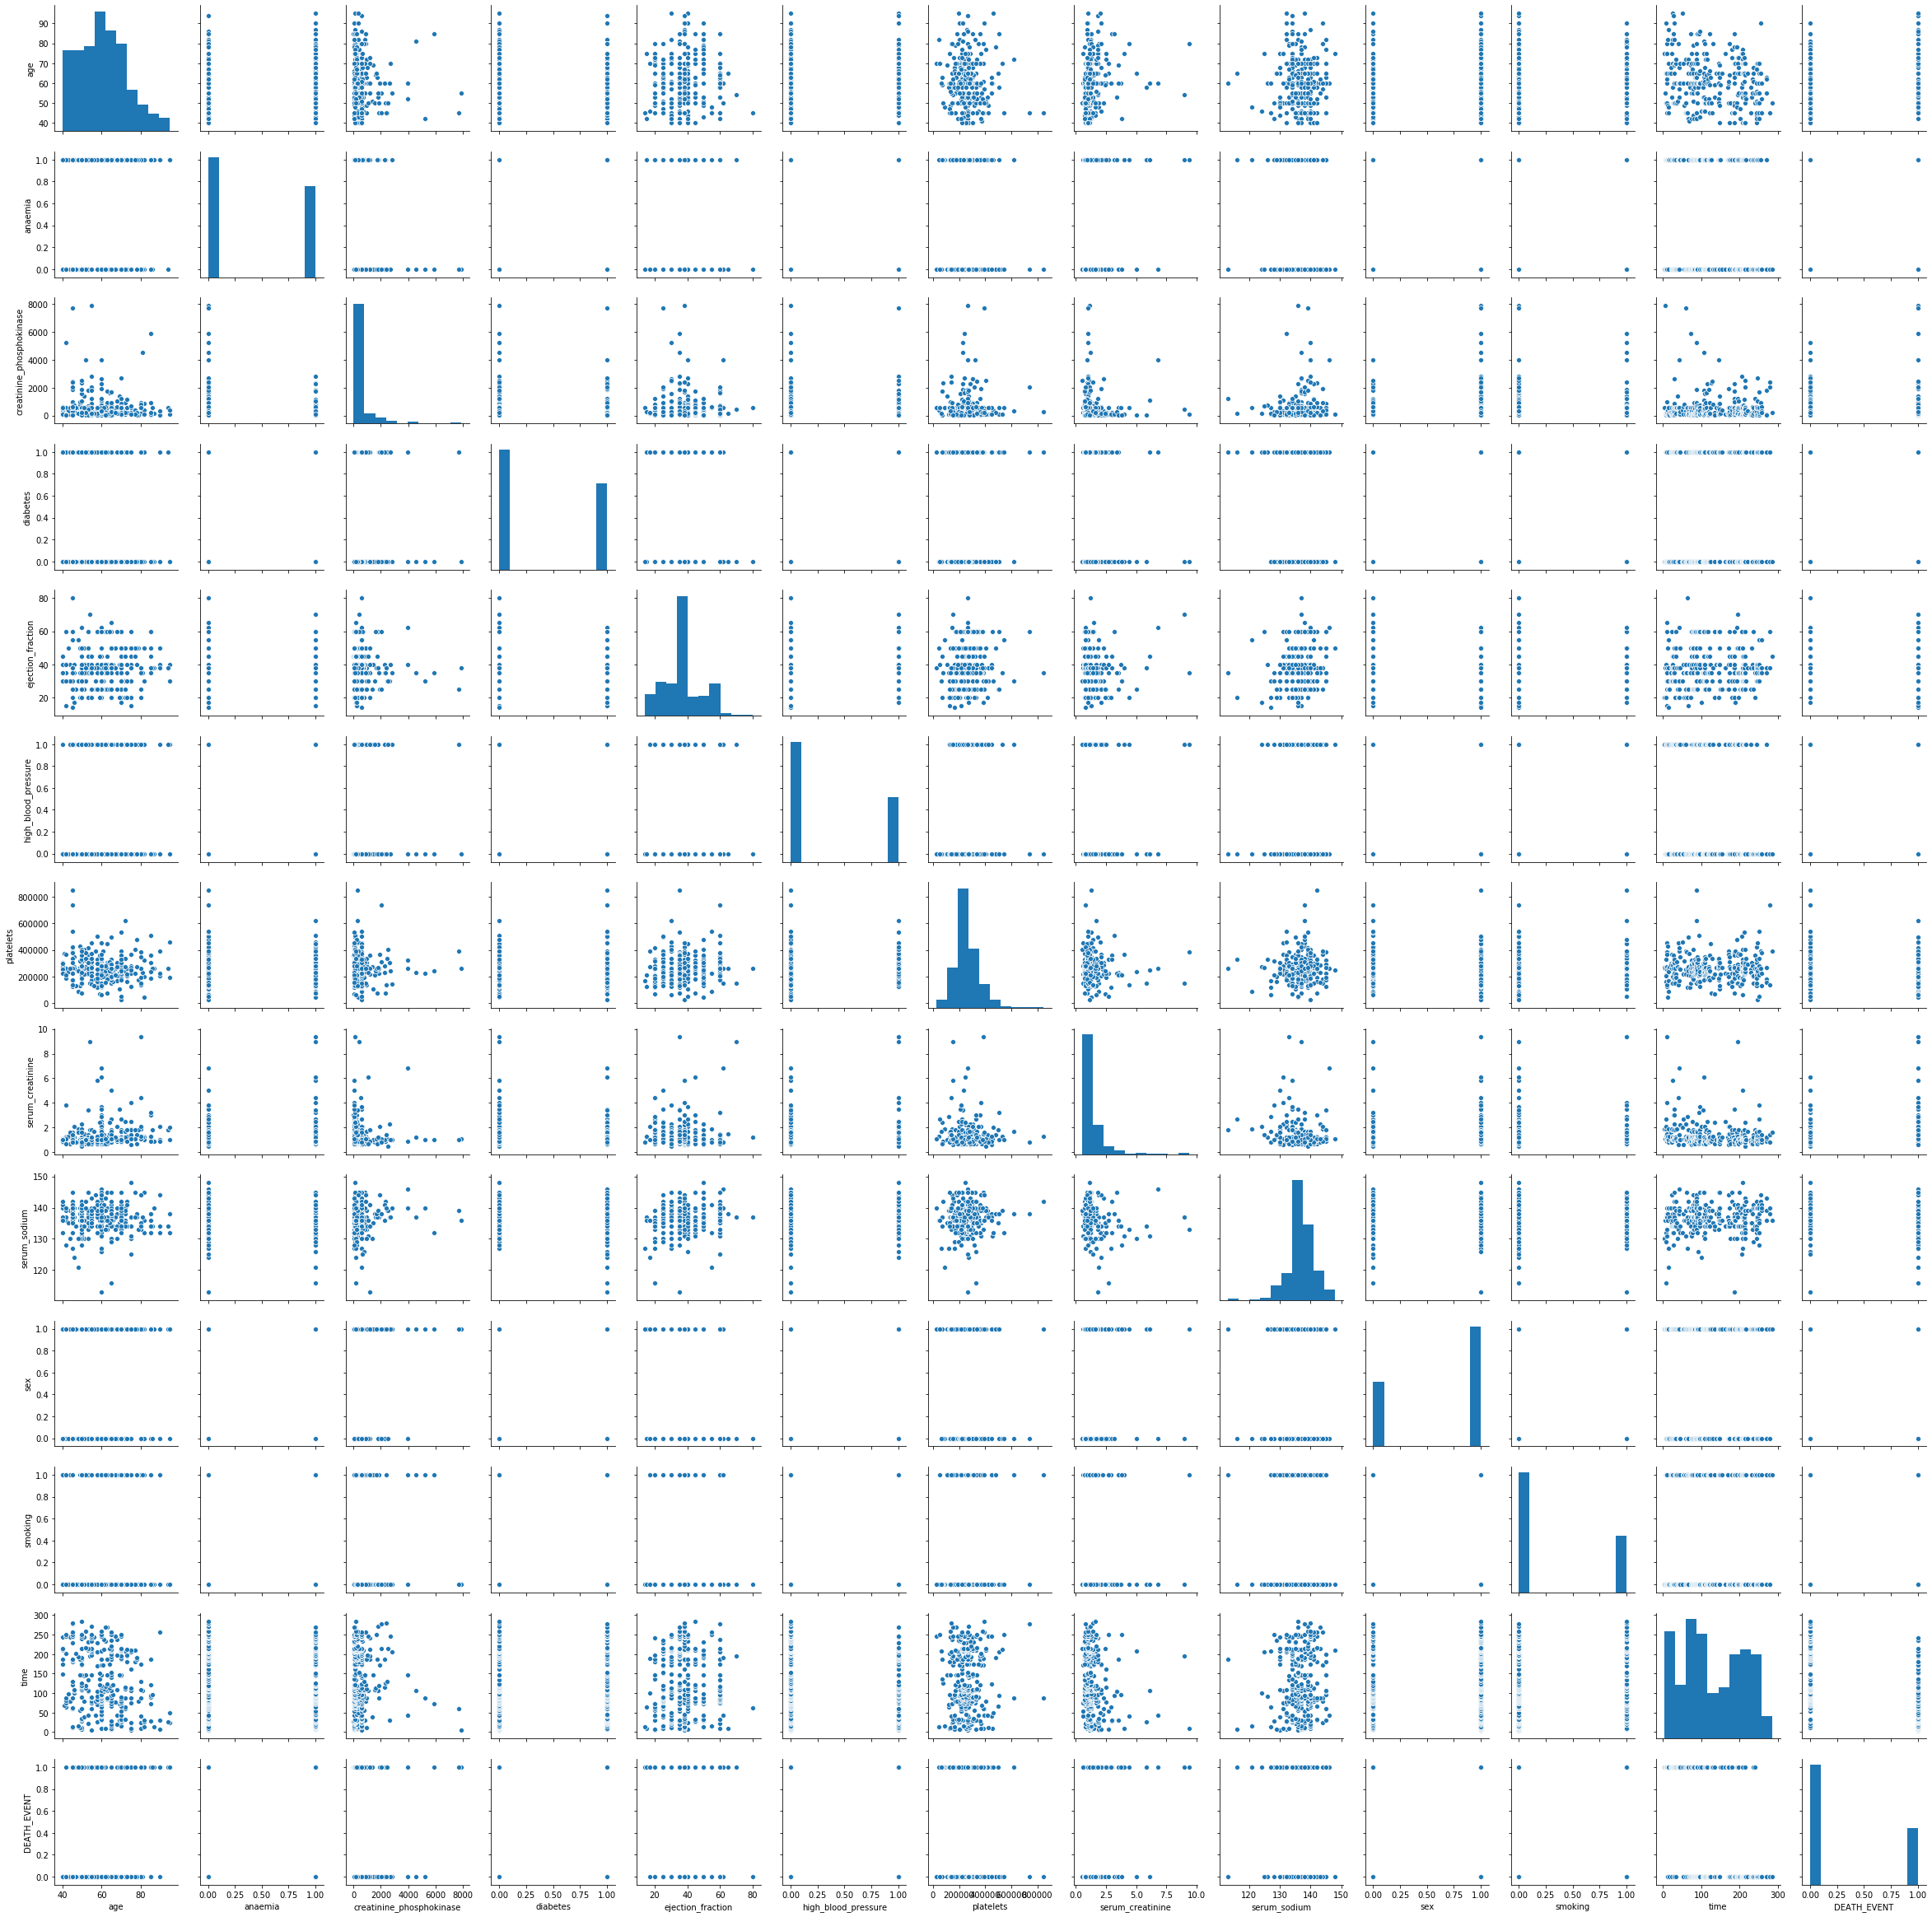

In [15]:
plt.figure(figsize=(20,10))
g = sns.pairplot(data=df,palette='Set3')

In [18]:
# the time data indicates the time the patient is sent to the hospital in a way that I can not figure out.
# I would be very interested in analyze what is the most vulnarable time during a day for hearts but I can not find
# the meaning of the time number
np.unique(df['time'])

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285])

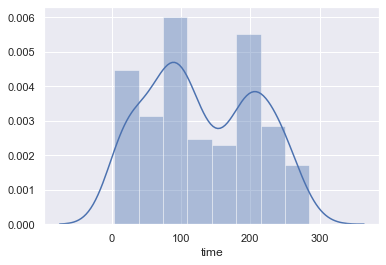

In [33]:
# the number of heart failures peaked at time 100 and time 200. I would keep on investigating what the time column 
# means and come back to it
# for now, I will drop the time column
sns.distplot(df['time'])

In [34]:
# drop time column
new_df = df.drop(['time'],axis=1)

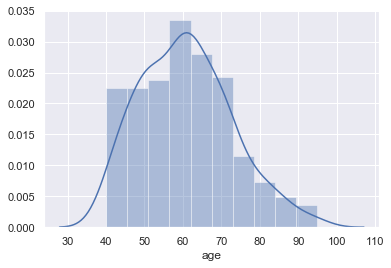

In [35]:
# let's see the age distribution for people that had heart failure
sns.distplot(df['age'])

In [37]:
# the majority of cases are above 40 years old with the most occurance at 60 to 65 years old

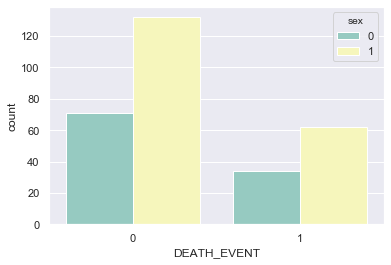

In [46]:
# let's explore among all the people that had heart failure, what is the ratio that end up alive 
# if the ratio is different for men and women, 0/green indicates women, 1/yellow indicates men
sns.countplot(df['DEATH_EVENT'],hue=df['sex'],palette='Set3')
# There are more numbers of males having heart failure
# roughly 2/3 of the cases survived

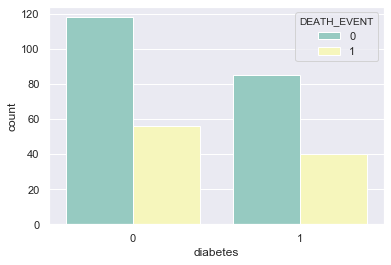

In [62]:
# check if death rate is associated with diabete. I expect the two features to be correlated
sns.countplot(df['diabetes'],hue=df['DEATH_EVENT'],palette='Set3')
# The rate of people with diabetes have higher risk of a heart failure

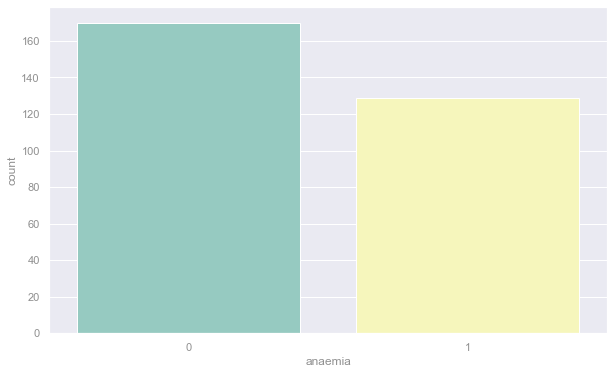

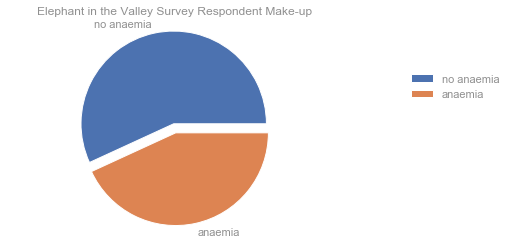

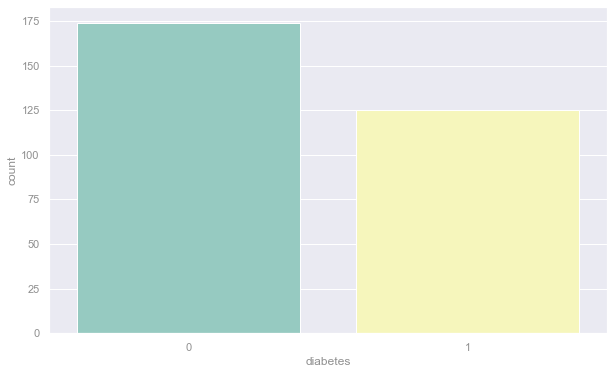

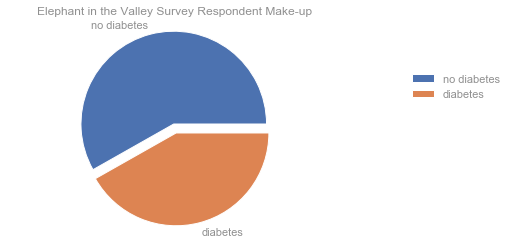

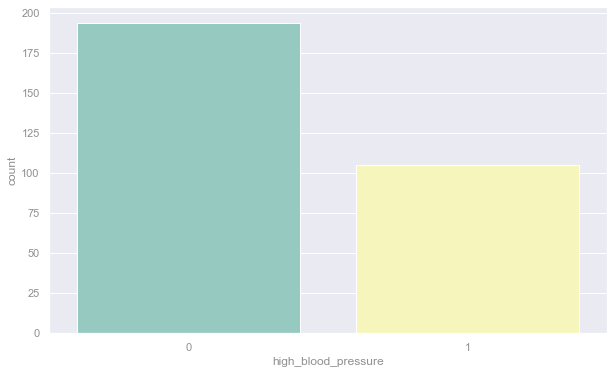

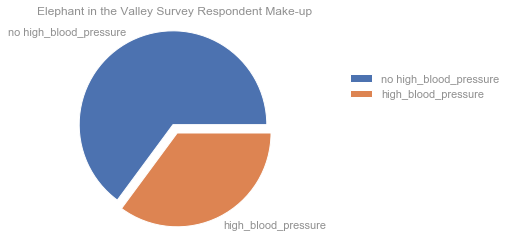

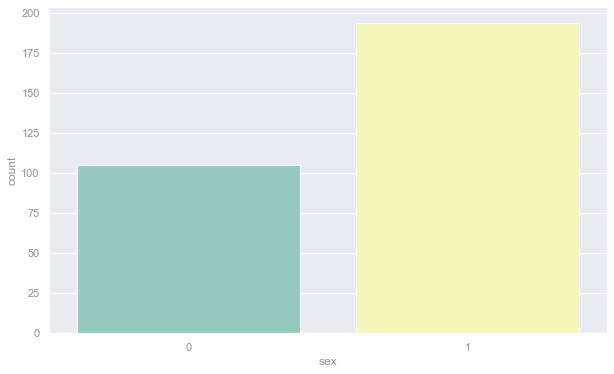

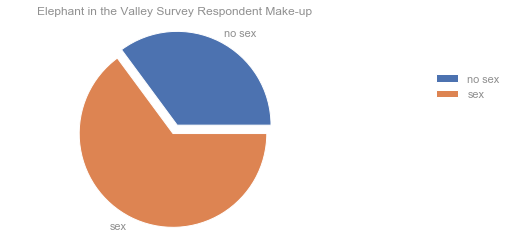

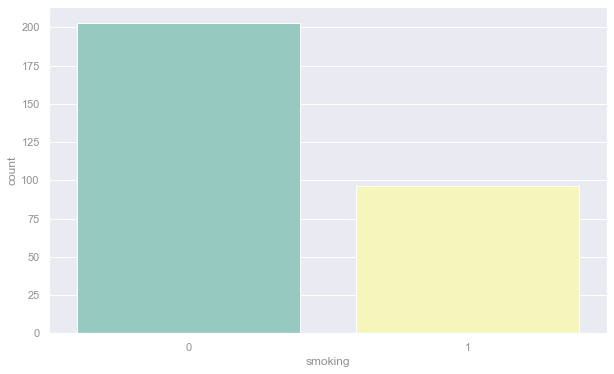

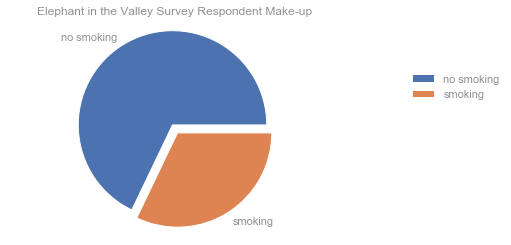

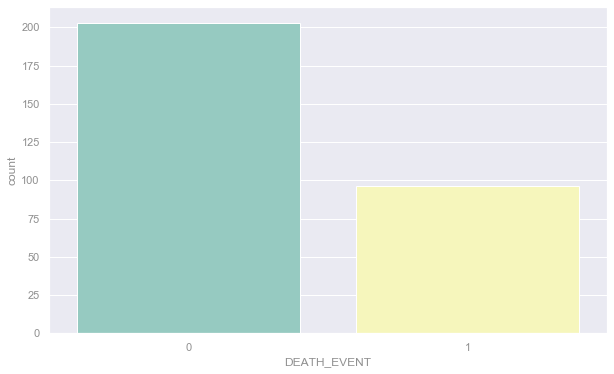

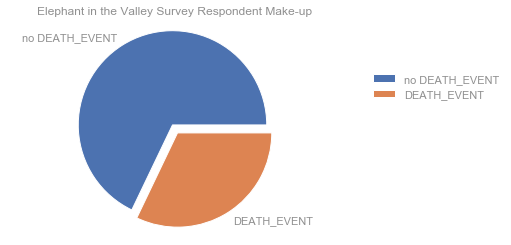

In [96]:
# after exploring all the feature I understand, we do a countplot for all the features in dataframe

new_df.columns
features = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for f in features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=f,data=new_df, palette='Set3')

    fig, ax = plt.subplots()
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#909090'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size']=12
    labels = [f'No {f}', 
             f]
    percentages = [df[f].value_counts()[0],df[f].value_counts()[1]]
    explode=(0.1,0)
    ax.pie(percentages, explode=explode, labels=labels)
    ax.axis('equal')
    ax.set_title("Elephant in the Valley Survey Respondent Make-up")
    ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# 2. Feature importance

In [99]:
# before running feature importance, split x variables and y variable first

In [114]:
new_df.shape

(299, 12)

In [115]:
x = new_df.drop('DEATH_EVENT',axis=1).values
y = new_df['DEATH_EVENT']

y = y.astype(int)

In [127]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
features=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 
          'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking']

In [155]:
f_name=[]
fi=[]
for i, column in enumerate(new_df.drop('DEATH_EVENT',axis=1)): 
    f_name.append(column)
    fi.append(dt.feature_importances_[i])
fi_df=zip(f_name,fi)

fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])

In [156]:
fi_df = fi_df.sort_values('Feature Importance',ascending=False).reset_index()

In [157]:
# from the feature importance, we can tell sex and if the patient is smoking don't effect the death rate of the patient
# from analysis before, there are clearly more male having heart failure
# we can conclude that male are more prone to having a heart failure, but gender doesn't effect the death rate of the 
# patient
fi_df

,index,Feature,Feature Importance
0,7,serum_creatinine,0.213029
1,2,creatinine_phosphokinase,0.196416
2,4,ejection_fraction,0.186946
3,6,platelets,0.146026
4,0,age,0.109503
5,8,serum_sodium,0.082108
6,1,anaemia,0.048000
7,3,diabetes,0.011985
8,5,high_blood_pressure,0.005985
9,9,sex,0.000000


In [158]:
# since sex and smoking are not useful, remove sex and smoking column
fi_df = fi_df[:9]

In [159]:
fi_df

,index,Feature,Feature Importance
0,7,serum_creatinine,0.213029
1,2,creatinine_phosphokinase,0.196416
2,4,ejection_fraction,0.186946
3,6,platelets,0.146026
4,0,age,0.109503
5,8,serum_sodium,0.082108
6,1,anaemia,0.048000
7,3,diabetes,0.011985
8,5,high_blood_pressure,0.005985


# 3. Splitting data

In [209]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.1)

In [210]:
x_train.shape

(215, 11)

In [211]:
y_train.shape

(215,)

In [212]:
x_test.shape

(60, 11)

In [213]:
y_test.shape

(60,)

# 4. Logistic regression

In [222]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [ ]:
log_reg = LogisticRegression(random_state=15,solver='lbfgs')

In [ ]:
log_reg = LogisticRegression(random_state=15,solver='lbfgs')

In [215]:
log_reg.fit(x_train,y_train)

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=15, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [218]:
# r2 score for training set is 0.76 which is not bad
log_reg.score(x_train,y_train)

0.7627906976744186

In [219]:
# r2 score for testing set is 0.71 slightly lower than training set
log_reg.score(x_test,y_test)

0.7166666666666667

In [223]:
y_pred = log_reg.predict(x_train)

In [225]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       142
           1       0.70      0.53      0.60        73

   micro avg       0.76      0.76      0.76       215
   macro avg       0.74      0.71      0.72       215
weighted avg       0.76      0.76      0.75       215



In [226]:
# recall rate for when y=1 is low. recall rate is True Positive/(True Positive + False Negative). The false negative
# could be high. Actual patient that can recover could be predicted as not able to recover. It is good for heart 
# failure prevention

In [241]:
# confusion matrix
cm = confusion_matrix(y_train,y_pred)
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)

In [242]:
cm

array([[125,  17],
       [ 34,  39]])

In [239]:
# plot confusion matrix
def plot_cm(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1.,
        annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0.,vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

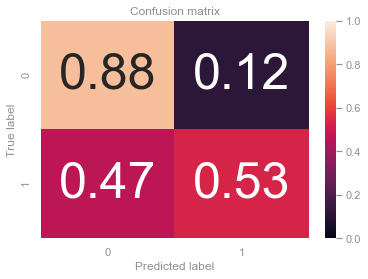

In [240]:
plot_cm(cm_norm,classes=log_reg.classes_,title='Confusion matrix')

In [244]:
# running log loss on training
log_loss(y_train,y_pred)
# running log loss on testing
#pred_proba_t = log_reg.predict_proba(x_test)
#log_loss(y_test,pred_proba_t

8.192982275798876